In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

# Importing dataset
df=pd.read_csv('amazon_review_american_tourister_bag.csv')
#df.SentimentText=df.SentimentText.astype(str)
print("Shape of data=>",df.shape)

Shape of data=> (4370, 4)


In [2]:
df.isnull().sum()

Unnamed: 0      0
Rating          0
Review title    1
Review          1
dtype: int64

In [3]:
df.dropna(subset=['Review title'], inplace = True)

In [4]:
df.isnull().sum()

Unnamed: 0      0
Rating          0
Review title    0
Review          0
dtype: int64

In [5]:
df.head(10)

,Unnamed: 0,Rating,Review title,Review
0,0,1,I got a defective piece. Since I was not ...,I got a defective piece. Since I was not at my...
1,1,1,Do not buy this bag,This bag is of the lowest quality you can imag...
2,2,2,Disliked the product but <3 to Amazon,Received the bag in the worst packaging I have...
3,3,1,Poor quality,The stiches of the bag is started coming out ...
4,4,5,Five Stars,Very nice bag ....Very light....And spacious. ...
5,5,1,Bad quality,Totally disappointed..Not at all worth buying....
6,6,5,Looks Great and Robust,I got this for 803 ...at this price it's great...
7,7,4,Good product at steal price,Product is good with classy looks...Have enoug...
8,8,2,it looks like a copy and the material quality ...,I got this bag just a moment ago..And my react...
9,9,1,Duplicate or low quality products are sold on ...,Initially the bag was very good. But with the ...


In [6]:
for index,text in enumerate(df['Review'][31:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 Good quality best product fast delivery and made with best quality of material and awesome size good colour best zip many pockets
Review 2:
 It is a good bag light weight and the stickers will not fade I am using it for 6 months. honest review the bag is good for that price so much spaces inside the bag I am using it every day the packaging is very good I love this bag nice design. And the stitches are very tough good product from American Tourister.I had not faced any problems while using this bag till now. The bag is not water resistant. Value for money
Review 3:
 Ordered this for my niece who is in class 9, she liked it as it can fit all her stuff and is easy to carry. All the zips and pockets are still working without any issue after 4 months. But now it's not being used very much  as all the schools are shut indefinitely.  But the bag is good , there is no issue that we faced.
Review 4:
 The product is superb with light weight.the only thing is missing is the key chain 

In [7]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['Review']=df['Review'].apply(lambda x:expand_contractions(x))

In [8]:
# df['cleaned']=df['Review'].apply(lambda x: x.lower())
# df['Review title']=df['Review title'].apply(lambda x: x.lower())

In [9]:
df.head()

,Unnamed: 0,Rating,Review title,Review
0,0,1,I got a defective piece. Since I was not ...,I got a defective piece. Since I was not at my...
1,1,1,Do not buy this bag,This bag is of the lowest quality you can imag...
2,2,2,Disliked the product but <3 to Amazon,Received the bag in the worst packaging I have...
3,3,1,Poor quality,The stiches of the bag is started coming out ...
4,4,5,Five Stars,Very nice bag ....Very light....And spacious. ...


In [10]:
# Remove digits and words containing digits
df['cleaned']=df['Review'].apply(lambda x: re.sub('\w*\d\w*',' ', x))

In [11]:
# Remove punctuation
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

In [12]:
# Remove extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [13]:
for index,text in enumerate(df['cleaned'][31:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 Good quality best product fast delivery and made with best quality of material and awesome size good colour best zip many pockets
Review 2:
 It is a good bag light weight and the stickers will not fade I am using it for months honest review the bag is good for that price so much spaces inside the bag I am using it every day the packaging is very good I love this bag nice design And the stitches are very tough good product from American Tourister I had not faced any problems while using this bag till now The bag is not water resistant Value for money
Review 3:
 Ordered this for my niece who is in class she liked it as it can fit all her stuff and is easy to carry All the zips and pockets are still working without any issue after months But now it is not being used very much as all the schools are shut indefinitely But the bag is good there is no issue that we faced 
Review 4:
 The product is superb with light weight the only thing is missing is the key chain which is being pr

In [14]:
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [15]:
for index,text in enumerate(df['cleaned'][31:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 Good quality best product fast delivery and made with best quality of material and awesome size good colour best zip many pockets
Review 2:
 It is a good bag light weight and the stickers will not fade I am using it for months honest review the bag is good for that price so much spaces inside the bag I am using it every day the packaging is very good I love this bag nice design And the stitches are very tough good product from American Tourister I had not faced any problems while using this bag till now The bag is not water resistant Value for money
Review 3:
 Ordered this for my niece who is in class she liked it as it can fit all her stuff and is easy to carry All the zips and pockets are still working without any issue after months But now it is not being used very much as all the schools are shut indefinitely But the bag is good there is no issue that we faced 
Review 4:
 The product is superb with light weight the only thing is missing is the key chain which is being pr

In [16]:
# Creating Document Term Matrix
'''from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df.index
df_dtm.head(10)'''

"from sklearn.feature_extraction.text import CountVectorizer\ncv=CountVectorizer(analyzer='word')\ndata=cv.fit_transform(df['lemmatized'])\ndf_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())\ndf_dtm.index=df.index\ndf_dtm.head(10)"

In [17]:
from textblob import TextBlob
df['polarity'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [18]:
df['review_len'] = df['lemmatized'].apply(lambda x: len(x))

In [19]:
def get_avg_word_len(x):
  words = x.split()
  word_len = 0
  for word in words:
    word_len = word_len + len(word)
  if (len(words) != 0):
    return word_len/len(words)

In [20]:
df['avg_word_len'] = df['lemmatized'].apply(lambda x: get_avg_word_len(x))

In [21]:
df.head()

,Unnamed: 0,Rating,Review title,Review,cleaned,lemmatized,polarity,review_len,avg_word_len
0,0,1,I got a defective piece. Since I was not ...,I got a defective piece. Since I was not at my...,I got a defective piece Since I was not at my ...,get defective piece home delivery period ask r...,0.000000,86,6.250000
1,1,1,Do not buy this bag,This bag is of the lowest quality you can imag...,This bag is of the lowest quality you can imag...,bag low quality imagine sure duplicate origina...,0.095000,89,5.428571
2,2,2,Disliked the product but <3 to Amazon,Received the bag in the worst packaging I have...,Received the bag in the worst packaging I have...,receive bag bad packaging see e commerce exper...,-0.183333,174,5.730769
3,3,1,Poor quality,The stiches of the bag is started coming out ...,The stiches of the bag is started coming out i...,stiche bag start come month feel cloth poor qu...,-0.400000,146,5.681818
4,4,5,Five Stars,Very nice bag ....Very light....And spacious. ...,Very nice bag Very light And spacious,nice bag light spacious,0.500000,23,5.000000


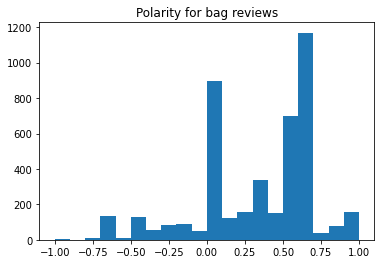

In [22]:
#df["polarity"].plot(kind = "hist", bins=20)
plt.hist(df["polarity"], bins = 20)
plt.title("Polarity for bag reviews")
plt.show()

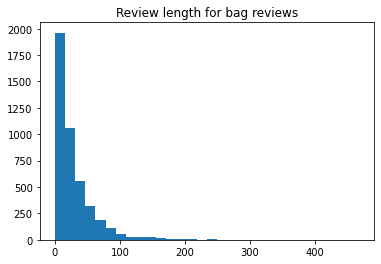

In [24]:
#df["review_len"].plot(kind = "hist", bins=10)
plt.hist(df["review_len"], bins = 30)
plt.title("Review length for bag reviews")
plt.show()

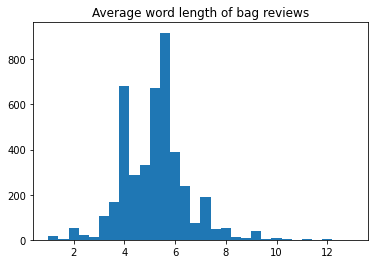

In [25]:
#df["avg_word_len"].plot(kind = "hist", bins=20)
plt.hist(df["avg_word_len"], bins = 30)[1]
plt.title("Average word length of bag reviews")
plt.show()

([<matplotlib.patches.Wedge at 0x7f2fdd2e3f10>,
 [Text(0.8050162230045088, 0.7496324970941128, '(0.999, 4.0]'),
  Text(-0.6811204674482417, 0.8637562786012549, '(4.0, 5.0]'),
  Text(-0.9514992072199584, -0.5519504132254917, '(5.0, 5.5]'),
  Text(0.20596320232132231, -1.0805457691784954, '(6.0, 13.0]'),
  Text(1.0046842293657046, -0.44789462964389337, '(5.5, 6.0]')])

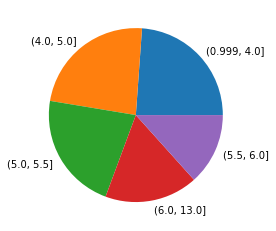

In [26]:
max_word_len = df.avg_word_len.max()
min_word_len = df.avg_word_len.min()
pie_bins = []
pie_bin_count = []
for i in range(6):
  pie_bins.append(min_word_len + (max_word_len - min_word_len) * i / 5)

df["pie_bins"] = pd.cut(df["avg_word_len"], pie_bins)
# df2 = df["pie_bins"].value_counts()
df["pie_quantile_bins"] = pd.qcut(df["avg_word_len"], 5)
df2 = df["pie_quantile_bins"].value_counts()

plt.pie(df2.values, labels = df2.index)

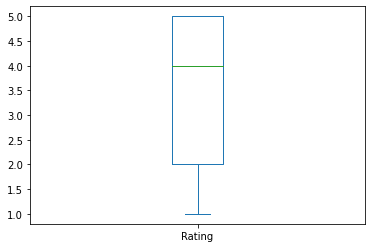

In [27]:
df["Rating"].plot(kind = "box")

130446


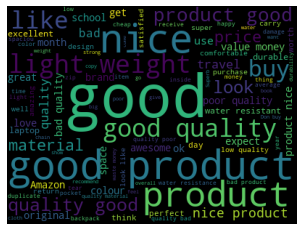

In [28]:
from wordcloud import WordCloud
text = " ".join(cat for cat in df.lemmatized)
print(len(text))
wc = WordCloud(width = 400, height = 300, stopwords = {"american", "tourister", "bag"}, max_words = 100).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [29]:
df.to_csv("output.csv")

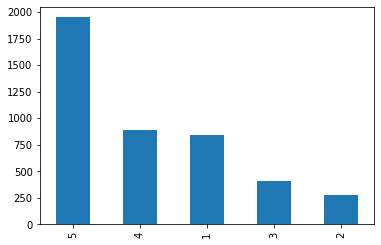

In [40]:
df=pd.read_csv('output_with_satisfaction.csv')

df['Rating'].value_counts().plot.bar()
# from matplotlib.pyplot import pie, axis, show
# sum = df['Rating satisfaction'].groupby(df.Rating).sum()
# axis('equal')
# pie(sum, labels = sum.index)
# show()